In [1]:
# Importar librerías necesarias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, applications, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# Configuración de GPU
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("🔧 GPU configurada correctamente")
else:
    print("🔧 Usando CPU")

# Seeds para reproducibilidad
tf.random.set_seed(42)
np.random.seed(42)

print("✅ Entorno TensorFlow/Keras configurado correctamente")

🔧 Usando CPU
✅ Entorno TensorFlow/Keras configurado correctamente


In [2]:
# === PREPARAR DATASET CIFAR-10 ===

print("📊 PREPARANDO DATASET CIFAR-10")
print("-" * 50)

# 1. Cargar dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()  # dataset CIFAR-10

# 2. Normalizar imágenes (0-255 -> 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 3. Convertir labels a categorical (one-hot encoding)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# 4. Definir nombres de clases
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print("📊 INFORMACIÓN DEL DATASET:")
print(f"   📈 Entrenamiento: {x_train.shape[0]} imágenes")
print(f"   🧪 Test: {x_test.shape[0]} imágenes")
print(f"   📐 Dimensiones: {x_train.shape[1:]} (HxWxC)")
print(f"   📋 Clases: {num_classes}")

# 5. Configurar batch size para entrenamiento
batch_size = 128
print(f"   📦 Batch size: {batch_size}")

📊 PREPARANDO DATASET CIFAR-10
--------------------------------------------------
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
📊 INFORMACIÓN DEL DATASET:
   📈 Entrenamiento: 50000 imágenes
   🧪 Test: 10000 imágenes
   📐 Dimensiones: (32, 32, 3) (HxWxC)
   📋 Clases: 10
   📦 Batch size: 128


In [4]:
# === CNN SIMPLE DESDE CERO ===

print("🏗️ IMPLEMENTANDO CNN SIMPLE")
print("-" * 50)

def create_simple_cnn(input_shape=(32, 32, 3), num_classes=10):
    model = keras.Sequential([
        # Bloque convolucional 1
        layers.Conv2D(32, (3, 3), padding='same', input_shape=input_shape),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),


        # Bloque convolucional 2
        layers.Conv2D(64, (3, 3), padding='same'),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),


        # Clasificador
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Crear modelo CNN simple
simple_cnn = create_simple_cnn()

# Compilar modelo
simple_cnn.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),  # optimizador popular
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Mostrar arquitectura
simple_cnn.summary()

# Contar parámetros
total_params = simple_cnn.count_params()
print(f"🏗️ MODELO CNN SIMPLE:")
print(f"   🔢 Parámetros: {total_params:,}")

🏗️ IMPLEMENTANDO CNN SIMPLE
--------------------------------------------------


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,122,186 (8.10 MB)

 Trainable params: 2,122,186 (8.10 MB)

 Non-trainable params: 0 (0.00 B)

🏗️ MODELO CNN SIMPLE:
   🔢 Parámetros: 2,122,186


In [5]:
# === TRANSFER LEARNING CON KERAS APPLICATIONS ===

print("🎯 IMPLEMENTANDO TRANSFER LEARNING")
print("-" * 50)

# 1. Crear modelo con transfer learning
def create_transfer_model(input_shape=(32, 32, 3), num_classes=10):
    base_model = applications.MobileNetV2(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )
    # Congelar capas del modelo base
    base_model.trainable = False

    # Crear modelo completo
    model = keras.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# 2. Crear modelo
transfer_model = create_transfer_model()

# Compilar modelo con learning rate más bajo para transfer learning
transfer_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),  # LR más bajo para transfer learning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Mostrar arquitectura
transfer_model.summary()

# Contar parámetros
total_params = transfer_model.count_params()
trainable_params = sum([tf.keras.backend.count_params(w) for w in transfer_model.trainable_weights])

print("🎯 MODELO CON TRANSFER LEARNING:")
print(f"   🔢 Parámetros totales: {total_params:,}")
print(f"   🔓 Parámetros entrenables: {trainable_params:,}")

🎯 IMPLEMENTANDO TRANSFER LEARNING
--------------------------------------------------
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

🎯 MODELO CON TRANSFER LEARNING:
   🔢 Parámetros totales: 2,270,794
   🔓 Parámetros entrenables: 12,810


In [6]:
# 3. Configurar fine-tuning
def setup_fine_tuning(model, unfreeze_layers=10):
    # Descongelar las últimas capas del modelo base
    base_model = model.layers[0]
    base_model.trainable = True

    # Congelar todas las capas excepto las últimas N
    for layer in base_model.layers[:-unfreeze_layers]:
        layer.trainable = False

    # Recompilar con learning rate más bajo
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.0001),  # LR más bajo para fine-tuning
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    trainable = sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
    print(f"🔓 Fine-tuning configurado - Parámetros entrenables: {trainable:,}")

    return model

# Configurar fine-tuning (opcional)
# transfer_model = setup_fine_tuning(transfer_model, unfreeze_layers=10)

In [9]:
# === ENTRENAMIENTO DE MODELOS ===

print("🏋️ CONFIGURANDO ENTRENAMIENTO")
print("-" * 50)

# Configurar callbacks
callbacks_list = [
    callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=3,
        restore_best_weights=True
    )
]

# Entrenar CNN simple
print("🏗️ ENTRENANDO CNN SIMPLE...")
simple_history = simple_cnn.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=callbacks_list,
    verbose=1
)

print("\n🎯 ENTRENANDO TRANSFER LEARNING...")
transfer_history = transfer_model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=callbacks_list,
    verbose=1
)

# Extraer métricas de entrenamiento
simple_train_acc = simple_history.history['accuracy']
simple_test_acc = simple_history.history['val_accuracy']
transfer_train_acc = transfer_history.history['accuracy']
transfer_test_acc = transfer_history.history['val_accuracy']

🏋️ CONFIGURANDO ENTRENAMIENTO
--------------------------------------------------
🏗️ ENTRENANDO CNN SIMPLE...
Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 106s 271ms/step - accuracy: 0.9117 - loss: 0.2671 - val_accuracy: 0.6912 - val_loss: 1.2637
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 107s 274ms/step - accuracy: 0.9176 - loss: 0.2426 - val_accuracy: 0.6960 - val_loss: 1.2928
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 138s 264ms/step - accuracy: 0.9340 - loss: 0.1946 - val_accuracy: 0.6871 - val_loss: 1.4261
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 143s 266ms/step - accuracy: 0.9502 - loss: 0.1519 - val_accuracy: 0.7009 - val_loss: 1.4874
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 144s 271ms/step - accuracy: 0.9579 - loss: 0.1290 - val_accuracy: 0.7029 - val_loss: 1.5657
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 266ms/step - accuracy: 0.9659 - loss: 0.1021 - val_accuracy: 0.6977 - val_loss: 1.6525
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 102s 260ms/step - accuracy: 0.9707 - loss: 0.0867 - val_acc

📊 EVALUACIÓN FINAL
--------------------------------------------------
📊 COMPARACIÓN FINAL:
🏗️ CNN Simple: 0.7029 (70.29%)
🎯 Transfer Learning: 0.3153 (31.53%)
📈 Mejora: -38.76%
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step


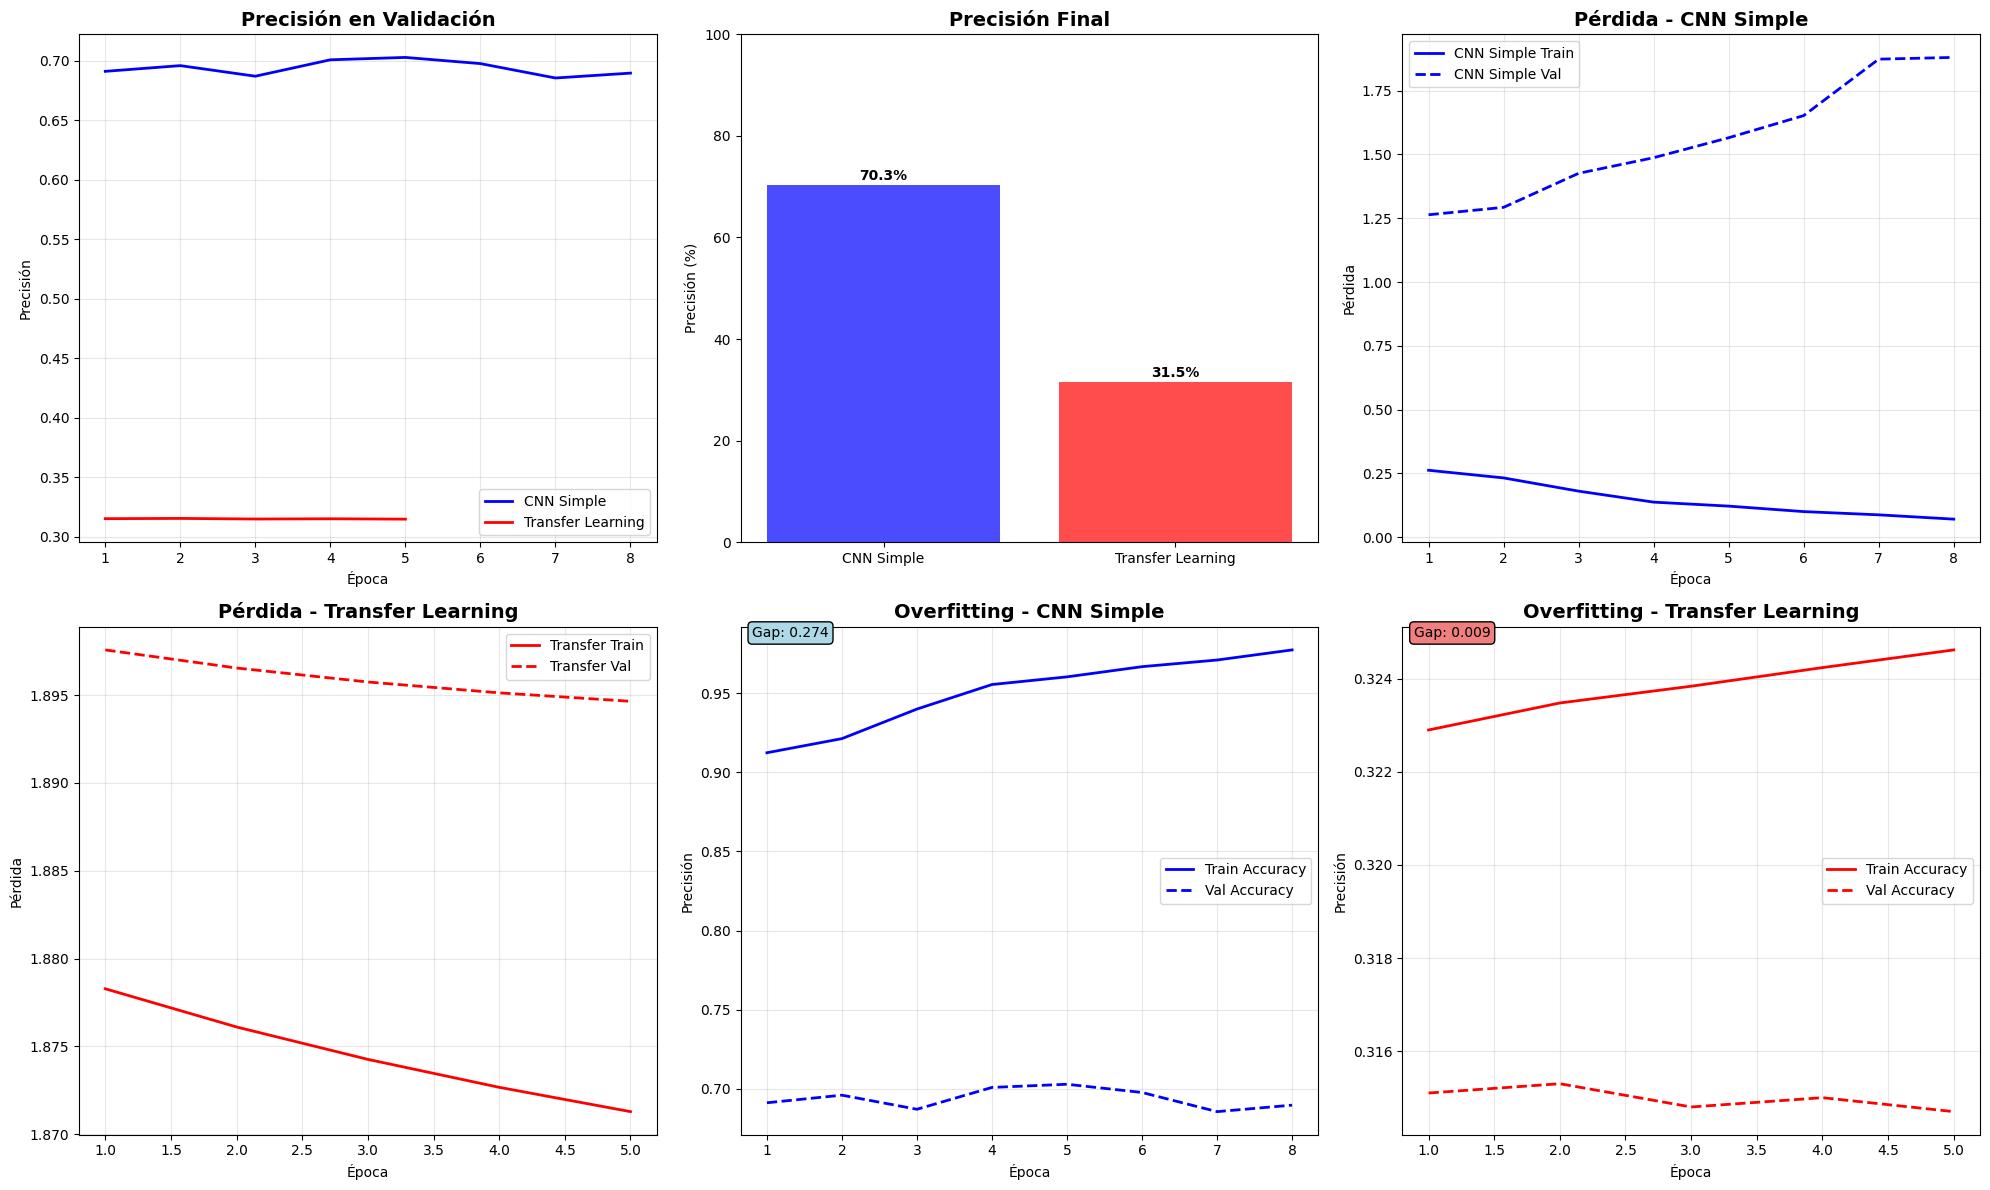


🔍 ANÁLISIS DE OVERFITTING:
🏗️ CNN Simple - Gap Train-Val: 0.274
🎯 Transfer Learning - Gap Train-Val: 0.009
⚠️ CNN Simple muestra overfitting significativo

📋 REPORTE DE CLASIFICACIÓN - CNN SIMPLE:
              precision    recall  f1-score   support

    airplane       0.71      0.78      0.74      1000
  automobile       0.80      0.85      0.82      1000
        bird       0.70      0.49      0.58      1000
         cat       0.61      0.38      0.47      1000
        deer       0.56      0.77      0.65      1000
         dog       0.54      0.70      0.61      1000
        frog       0.77      0.76      0.76      1000
       horse       0.71      0.79      0.75      1000
        ship       0.86      0.79      0.83      1000
       truck       0.85      0.72      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000


📋 REPORTE DE CLASIFICACIÓN - TRANSFER LEAR

In [10]:
# === EVALUACIÓN FINAL ===

print("📊 EVALUACIÓN FINAL")
print("-" * 50)

# Evaluar ambos modelos
simple_loss, simple_acc = simple_cnn.evaluate(x_test, y_test, verbose=0)
transfer_loss, transfer_acc = transfer_model.evaluate(x_test, y_test, verbose=0)

# Comparar resultados
print("📊 COMPARACIÓN FINAL:")
print(f"🏗️ CNN Simple: {simple_acc:.4f} ({simple_acc*100:.2f}%)")
print(f"🎯 Transfer Learning: {transfer_acc:.4f} ({transfer_acc*100:.2f}%)")
print(f"📈 Mejora: {(transfer_acc - simple_acc)*100:+.2f}%")

# Obtener predicciones para análisis detallado
simple_predictions = simple_cnn.predict(x_test)
transfer_predictions = transfer_model.predict(x_test)

# Convertir predicciones a clases
simple_pred_classes = np.argmax(simple_predictions, axis=1)
transfer_pred_classes = np.argmax(transfer_predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Graficar resultados con análisis de overfitting
plt.figure(figsize=(20, 12))

# Crear épocas específicas para cada métrica
simple_acc_epochs = range(1, len(simple_train_acc) + 1)
simple_loss_epochs = range(1, len(simple_history.history['loss']) + 1)
transfer_acc_epochs = range(1, len(transfer_train_acc) + 1)
transfer_loss_epochs = range(1, len(transfer_history.history['loss']) + 1)

# 1. Precisión en Validación
plt.subplot(2, 3, 1)
plt.plot(simple_acc_epochs, simple_test_acc, 'b-', label='CNN Simple', linewidth=2)
plt.plot(transfer_acc_epochs, transfer_test_acc, 'r-', label='Transfer Learning', linewidth=2)
plt.title('Precisión en Validación', fontsize=14, fontweight='bold')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Precisión Final (Bar Chart)
plt.subplot(2, 3, 2)
models = ['CNN Simple', 'Transfer Learning']
accuracies = [simple_acc*100, transfer_acc*100]
bars = plt.bar(models, accuracies, color=['blue', 'red'], alpha=0.7)
plt.title('Precisión Final', fontsize=14, fontweight='bold')
plt.ylabel('Precisión (%)')
plt.ylim(0, 100)

for i, (bar, acc) in enumerate(zip(bars, accuracies)):
    plt.text(bar.get_x() + bar.get_width()/2, acc + 1, f'{acc:.1f}%',
             ha='center', fontweight='bold')

# 3. Pérdida durante Entrenamiento (CNN Simple)
plt.subplot(2, 3, 3)
plt.plot(simple_loss_epochs, simple_history.history['loss'], 'b-', label='CNN Simple Train', linewidth=2)
plt.plot(simple_loss_epochs, simple_history.history['val_loss'], 'b--', label='CNN Simple Val', linewidth=2)
plt.title('Pérdida - CNN Simple', fontsize=14, fontweight='bold')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Pérdida durante Entrenamiento (Transfer Learning)
plt.subplot(2, 3, 4)
plt.plot(transfer_loss_epochs, transfer_history.history['loss'], 'r-', label='Transfer Train', linewidth=2)
plt.plot(transfer_loss_epochs, transfer_history.history['val_loss'], 'r--', label='Transfer Val', linewidth=2)
plt.title('Pérdida - Transfer Learning', fontsize=14, fontweight='bold')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Análisis de Overfitting - CNN Simple
plt.subplot(2, 3, 5)
train_acc = simple_history.history['accuracy']
val_acc = simple_history.history['val_accuracy']
plt.plot(simple_acc_epochs, train_acc, 'b-', label='Train Accuracy', linewidth=2)
plt.plot(simple_acc_epochs, val_acc, 'b--', label='Val Accuracy', linewidth=2)
plt.title('Overfitting - CNN Simple', fontsize=14, fontweight='bold')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True, alpha=0.3)

# Calcular gap de overfitting
overfitting_gap_simple = max(train_acc) - max(val_acc)
plt.text(0.02, 0.98, f'Gap: {overfitting_gap_simple:.3f}',
         transform=plt.gca().transAxes, fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))

# 6. Análisis de Overfitting - Transfer Learning
plt.subplot(2, 3, 6)
train_acc_tl = transfer_history.history['accuracy']
val_acc_tl = transfer_history.history['val_accuracy']
plt.plot(transfer_acc_epochs, train_acc_tl, 'r-', label='Train Accuracy', linewidth=2)
plt.plot(transfer_acc_epochs, val_acc_tl, 'r--', label='Val Accuracy', linewidth=2)
plt.title('Overfitting - Transfer Learning', fontsize=14, fontweight='bold')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True, alpha=0.3)

# Calcular gap de overfitting
overfitting_gap_tl = max(train_acc_tl) - max(val_acc_tl)
plt.text(0.02, 0.98, f'Gap: {overfitting_gap_tl:.3f}',
         transform=plt.gca().transAxes, fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))

plt.tight_layout()
plt.show()

# Análisis de overfitting
print("\n🔍 ANÁLISIS DE OVERFITTING:")
print(f"🏗️ CNN Simple - Gap Train-Val: {overfitting_gap_simple:.3f}")
print(f"🎯 Transfer Learning - Gap Train-Val: {overfitting_gap_tl:.3f}")

if overfitting_gap_simple > 0.1:
    print("⚠️ CNN Simple muestra overfitting significativo")
if overfitting_gap_tl > 0.1:
    print("⚠️ Transfer Learning muestra overfitting significativo")

# Reporte de clasificación
print("\n📋 REPORTE DE CLASIFICACIÓN - CNN SIMPLE:")
print(classification_report(true_classes, simple_pred_classes, target_names=class_names))

print("\n📋 REPORTE DE CLASIFICACIÓN - TRANSFER LEARNING:")
print(classification_report(true_classes, transfer_pred_classes, target_names=class_names))